In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer, StandardScaler
from io import StringIO


In [2]:
import seaborn as sns

In [3]:
import os
path = os.getcwd()
print(path)

/Users/jdear/HBSDissertation


In [4]:
os.chdir('/Users/jdear/HBSDissertation')
path = os.getcwd()
print(path)

/Users/jdear/HBSDissertation


In [5]:
AcctSuccessProgMerged = pd.read_csv('/Users/jdear/HBSDissertation/AcctSuccessProgMerged.csv')
AcctSuccessProgMerged.columns

Index(['Unnamed: 0', 'Account__r.CSG_Coverage__c', 'Account__r.AOV_Band__c',
       'Account__r.CSM_lookup__r', 'Core_SFA_EWS_360_Score__c',
       'Lightning_Adoption_Stage__c', 'Core_Service_EWS_360_Score__c',
       'Weighted_EWS_Score__c', 'Platform_Adoption__c',
       'Lightning_Adoption__c', 'Current_Adoption_Growth__c',
       'TLP_TTM30Days_SalesService__c', 'FY_TLP_Baseline_SalesService__c',
       'TLP_30Days_SalesService__c', 'EWS_360_Scores_Snap_Date__c', 'uuid',
       'ADR', 'Accelerator', 'Admin Assist', 'Community',
       'Customer Success Request', 'Digital Campaigns', 'Einstein Assessor',
       'Email', 'Executive/Critical Incidents', 'High Touch',
       'In Person Training', 'In-App', 'JavaScript Buttons Check',
       'Live and Virtual Events', 'MANUAL_PROD', 'Optimizer',
       'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD', 'Success Apps',
       'Success Assessment', 'Success Play', 'Support Case', 'Trail',
       'User Group', 'Video', 'Visualforce Che

In [6]:
# tidyup
del AcctSuccessProgMerged['Unnamed: 0']

In [7]:
AcctSuccessProgMerged.head(5)

,Account__r.CSG_Coverage__c,Account__r.AOV_Band__c,Account__r.CSM_lookup__r,Core_SFA_EWS_360_Score__c,Lightning_Adoption_Stage__c,Core_Service_EWS_360_Score__c,Weighted_EWS_Score__c,Platform_Adoption__c,Lightning_Adoption__c,Current_Adoption_Growth__c,...,Trail,User Group,Video,Visualforce Check,Web,Webinar,Total Sprogs,High Count,Low Count,Tech Count
0,Focus,$0,NaN,14.0,0. None / Unknown,NaN,6120.0,0.00,No Lightning Usage,-36.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Focus,$1M-5M,[User],91.0,4. Activation,81.0,8132.0,0.57,Lightning Enabled,-6.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Focus,$0,NaN,56.0,4. Activation,NaN,864.0,0.79,Lightning Enabled,-5.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Top,$10k-50k,NaN,28.0,4. Activation,47.0,1406.0,0.09,Lightning Enabled,1.66,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,3.0
4,Focus,$0,NaN,63.0,1. Awareness,NaN,576.0,0.79,No Lightning Usage,-4.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(AcctSuccessProgMerged.index)

18787

In [9]:
AcctSuccessProgMerged.describe()

,Core_SFA_EWS_360_Score__c,Core_Service_EWS_360_Score__c,Weighted_EWS_Score__c,Platform_Adoption__c,Current_Adoption_Growth__c,TLP_TTM30Days_SalesService__c,FY_TLP_Baseline_SalesService__c,TLP_30Days_SalesService__c,ADR,Accelerator,...,Trail,User Group,Video,Visualforce Check,Web,Webinar,Total Sprogs,High Count,Low Count,Tech Count
count,10201.000000,10017.000000,1.878700e+04,18414.000000,1.280600e+04,12813.000000,12804.000000,18620.000000,825.000000,1.0,...,6610.000000,94.000000,2371.000000,106.000000,333.000000,2476.000000,12884.000000,12884.000000,12884.000000,12884.000000
mean,51.131850,59.640811,8.095054e+04,0.469755,2.529421e+02,72.652991,74.751418,66.268257,2.435152,1.0,...,102.840242,3.138298,8.942640,1.452830,1.636637,4.231018,111.312093,1.133809,6.095545,104.028485
std,23.114476,19.774431,7.646452e+05,0.328612,1.010309e+04,24.452004,24.612624,31.102138,2.213370,NaN,...,4191.917304,4.533273,23.402083,0.927178,1.322913,9.881640,3055.103690,23.616712,32.524959,3052.977395
min,1.000000,9.000000,0.000000e+00,0.000000,-9.809000e+01,0.000000,0.000000,0.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,49.000000,1.600000e+02,0.170000,-6.487500e+00,60.540563,62.630167,50.000000,1.000000,1.0,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,54.000000,61.000000,2.070000e+03,0.430000,0.000000e+00,79.156338,81.277978,75.000000,2.000000,1.0,...,7.000000,2.000000,4.000000,1.000000,1.000000,2.000000,11.000000,0.000000,2.000000,7.000000
75%,67.000000,77.000000,1.644400e+04,0.790000,5.177500e+00,91.515152,94.211779,91.192500,3.000000,1.0,...,20.000000,3.000000,8.000000,1.750000,2.000000,4.000000,37.000000,0.000000,5.000000,30.000000
max,97.000000,97.000000,3.892596e+07,1.000000,1.009503e+06,100.000000,100.000000,100.000000,37.000000,1.0,...,335136.000000,41.000000,808.000000,6.000000,12.000000,327.000000,335234.000000,2595.000000,2949.000000,335184.000000


In [10]:
# Define SM activities columns
SMActivities_cols =['ADR', 'Admin Assist', 'Community', 'Customer Success Request',
       'Einstein Assessor', 'Email', 'Executive/Critical Incidents',
       'High Touch', 'In Person Training', 'In-App',
       'JavaScript Buttons Check', 'Live and Virtual Events', 'MANUAL_PROD',
       'Optimizer', 'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD',
       'Success Apps', 'Success Assessment', 'Success Play', 'Support Case',
       'Trail', 'User Group', 'Video', 'Visualforce Check', 'Web', 'Webinar',
       'Total Sprogs', 'hasSM']

In [11]:
# Define Success Outcome Category columns
SuccOutcomeCat_cols =['High Count', 'Low Count', 'Tech Count']


In [12]:
# Define Success Outcome Activities columns
SuccOutcome_cols =['Core_SFA_EWS_360_Score__c', 'Core_Service_EWS_360_Score__c',
       'Weighted_EWS_Score__c','Current_Adoption_Growth__c',
       'TLP_30Days_SalesService__c']


# Weighted EWS score

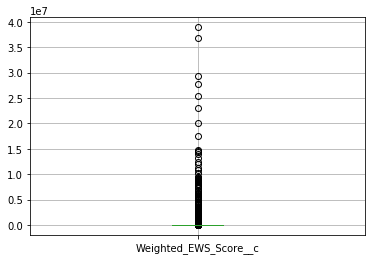

In [13]:
boxplot =AcctSuccessProgMerged.boxplot(column=['Weighted_EWS_Score__c'])

In [14]:
AcctSuccessProgMerged['Weighted_EWS_Score__c'].describe()

count    1.878700e+04
mean     8.095054e+04
std      7.646452e+05
min      0.000000e+00
25%      1.600000e+02
50%      2.070000e+03
75%      1.644400e+04
max      3.892596e+07
Name: Weighted_EWS_Score__c, dtype: float64

In [15]:
print(AcctSuccessProgMerged['Weighted_EWS_Score__c'].skew())

28.041861028260342


In [16]:
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(AcctSuccessProgMerged['Weighted_EWS_Score__c'], 25), percentile(AcctSuccessProgMerged['Weighted_EWS_Score__c'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=160.000, 75th=16444.000, IQR=16284.000


In [17]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print (lower, upper)

-24266.0 40870.0


In [18]:
# Identify 95 and 5% percentile levels
print(AcctSuccessProgMerged['Weighted_EWS_Score__c'].quantile(0.05))
print(AcctSuccessProgMerged['Weighted_EWS_Score__c'].quantile(0.95))

0.0
188443.00000000047


In [19]:
# Create Capped EWS Column
AcctSuccessProgMerged['Capped Weighted_EWS_Score__c'] = AcctSuccessProgMerged['Weighted_EWS_Score__c']
AcctSuccessProgMerged.head()

,Account__r.CSG_Coverage__c,Account__r.AOV_Band__c,Account__r.CSM_lookup__r,Core_SFA_EWS_360_Score__c,Lightning_Adoption_Stage__c,Core_Service_EWS_360_Score__c,Weighted_EWS_Score__c,Platform_Adoption__c,Lightning_Adoption__c,Current_Adoption_Growth__c,...,User Group,Video,Visualforce Check,Web,Webinar,Total Sprogs,High Count,Low Count,Tech Count,Capped Weighted_EWS_Score__c
0,Focus,$0,NaN,14.0,0. None / Unknown,NaN,6120.0,0.00,No Lightning Usage,-36.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6120.0
1,Focus,$1M-5M,[User],91.0,4. Activation,81.0,8132.0,0.57,Lightning Enabled,-6.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8132.0
2,Focus,$0,NaN,56.0,4. Activation,NaN,864.0,0.79,Lightning Enabled,-5.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864.0
3,Top,$10k-50k,NaN,28.0,4. Activation,47.0,1406.0,0.09,Lightning Enabled,1.66,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,3.0,1406.0
4,Focus,$0,NaN,63.0,1. Awareness,NaN,576.0,0.79,No Lightning Usage,-4.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576.0


In [20]:
# Cap at 95 percentile level
AcctSuccessProgMerged['Capped Weighted_EWS_Score__c'] = np.where(AcctSuccessProgMerged['Capped Weighted_EWS_Score__c'] > 40870, 40870, AcctSuccessProgMerged['Capped Weighted_EWS_Score__c'])

In [21]:
AcctSuccessProgMerged['Capped Weighted_EWS_Score__c'].describe()

count    18787.000000
mean     10818.995052
std      15165.475127
min          0.000000
25%        160.000000
50%       2070.000000
75%      16444.000000
max      40870.000000
Name: Capped Weighted_EWS_Score__c, dtype: float64

In [22]:
print(AcctSuccessProgMerged['Capped Weighted_EWS_Score__c'].skew())

1.203376587874665


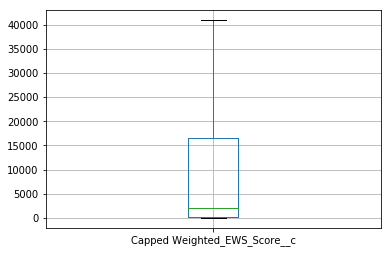

In [23]:
boxplot =AcctSuccessProgMerged.boxplot(column=['Capped Weighted_EWS_Score__c'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aedd69c18>]],
      dtype=object)

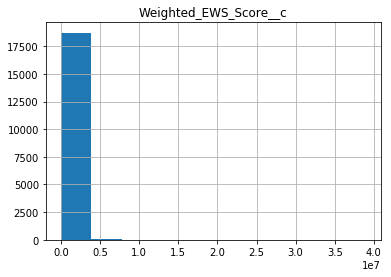

In [24]:
AcctSuccessProgMerged.hist(column='Weighted_EWS_Score__c', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aedc0ec88>]],
      dtype=object)

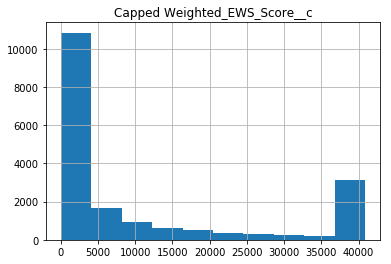

In [25]:
AcctSuccessProgMerged.hist(column='Capped Weighted_EWS_Score__c', bins=10)

# Looking at total SProg

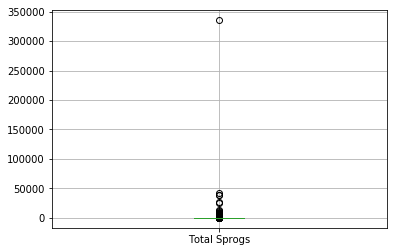

In [26]:
boxplot =AcctSuccessProgMerged.boxplot(column=['Total Sprogs'])

In [27]:
AcctSuccessProgMerged['Total Sprogs'].describe()

count     12884.000000
mean        111.312093
std        3055.103690
min           1.000000
25%           3.000000
50%          11.000000
75%          37.000000
max      335234.000000
Name: Total Sprogs, dtype: float64

In [28]:
print(AcctSuccessProgMerged['Total Sprogs'].skew())

103.12037188093073


In [29]:
# Identify 25 and 75% percentile levels
print(AcctSuccessProgMerged['Total Sprogs'].quantile(0.25))
print(AcctSuccessProgMerged['Total Sprogs'].quantile(0.75))

3.0
37.0


In [30]:
# calculate interquartile range
iqr = 37 - 3

In [31]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = 3 - cut_off, 37 + cut_off
print (lower, upper)

-48.0 88.0


In [32]:
# Identify 95 and 5% percentile levels
print(AcctSuccessProgMerged['Total Sprogs'].quantile(0.5))
print(AcctSuccessProgMerged['Total Sprogs'].quantile(0.95))

11.0
243.0


In [33]:
# Create Capped Sprogs Column
AcctSuccessProgMerged['Capped Total Sprogs'] = AcctSuccessProgMerged['Total Sprogs']
AcctSuccessProgMerged.head()

,Account__r.CSG_Coverage__c,Account__r.AOV_Band__c,Account__r.CSM_lookup__r,Core_SFA_EWS_360_Score__c,Lightning_Adoption_Stage__c,Core_Service_EWS_360_Score__c,Weighted_EWS_Score__c,Platform_Adoption__c,Lightning_Adoption__c,Current_Adoption_Growth__c,...,Video,Visualforce Check,Web,Webinar,Total Sprogs,High Count,Low Count,Tech Count,Capped Weighted_EWS_Score__c,Capped Total Sprogs
0,Focus,$0,NaN,14.0,0. None / Unknown,NaN,6120.0,0.00,No Lightning Usage,-36.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6120.0,NaN
1,Focus,$1M-5M,[User],91.0,4. Activation,81.0,8132.0,0.57,Lightning Enabled,-6.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8132.0,NaN
2,Focus,$0,NaN,56.0,4. Activation,NaN,864.0,0.79,Lightning Enabled,-5.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864.0,NaN
3,Top,$10k-50k,NaN,28.0,4. Activation,47.0,1406.0,0.09,Lightning Enabled,1.66,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,3.0,1406.0,3.0
4,Focus,$0,NaN,63.0,1. Awareness,NaN,576.0,0.79,No Lightning Usage,-4.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576.0,NaN


In [34]:
# Cap at 95 percentile level
AcctSuccessProgMerged['Capped Total Sprogs'] = np.where(AcctSuccessProgMerged['Capped Total Sprogs'] > 88.0, 88.0, AcctSuccessProgMerged['Capped Total Sprogs'])

In [37]:
print(AcctSuccessProgMerged['Capped Total Sprogs'].skew())

1.1992322554955097


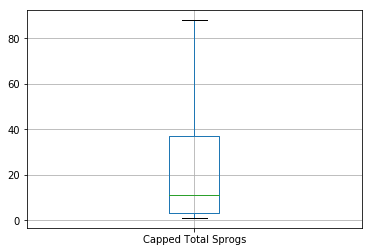

In [38]:
boxplot =AcctSuccessProgMerged.boxplot(column=['Capped Total Sprogs'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aedd69710>]],
      dtype=object)

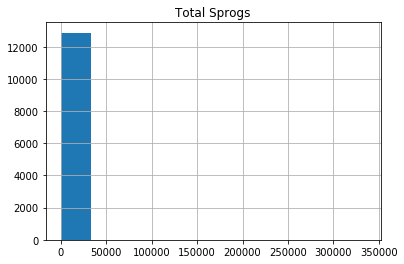

In [39]:
AcctSuccessProgMerged.hist(column='Total Sprogs', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af3493438>]],
      dtype=object)

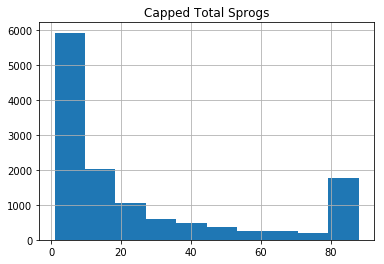

In [40]:
AcctSuccessProgMerged.hist(column='Capped Total Sprogs', bins=10)

In [41]:
AcctSuccessProgMerged['Capped Total Sprogs'].describe()

count    12884.000000
mean        25.365803
std         29.935234
min          1.000000
25%          3.000000
50%         11.000000
75%         37.000000
max         88.000000
Name: Capped Total Sprogs, dtype: float64

# Looking for Correlations

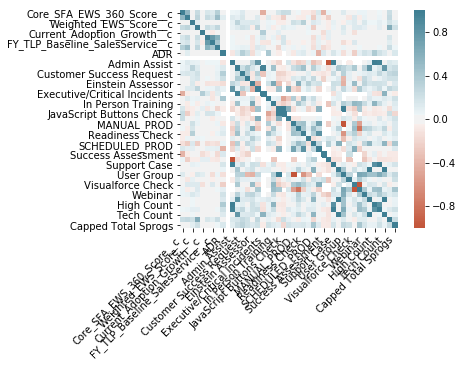

In [42]:
corr = AcctSuccessProgMerged.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [43]:
AcctSuccessProgMergedSubset = pd.DataFrame(AcctSuccessProgMerged,columns=['Capped Total Sprogs',
                                                 'Capped Weighted_EWS_Score__c',
                                                 'TLP_30Days_SalesService__c',
                                                 'Platform_Adoption__c',   
                                                 'Core_Service_EWS_360_Score__c', 
                                                 'Core_SFA_EWS_360_Score__c'])



In [44]:
corr = AcctSuccessProgMergedSubset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Capped Total Sprogs,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c
Capped Total Sprogs,1,0.234,0.0455,0.213,0.000181,0.0162
Capped Weighted_EWS_Score__c,0.234,1,0.237,0.611,0.259,0.24
TLP_30Days_SalesService__c,0.0455,0.237,1,0.287,0.499,0.342
Platform_Adoption__c,0.213,0.611,0.287,1,0.309,0.256
Core_Service_EWS_360_Score__c,0.000181,0.259,0.499,0.309,1,0.55
Core_SFA_EWS_360_Score__c,0.0162,0.24,0.342,0.256,0.55,1


In [45]:
corr = AcctSuccessProgMergedSubset.corr()
corr.style.background_gradient(cmap='Greens').set_precision(3)

,Capped Total Sprogs,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c
Capped Total Sprogs,1,0.234,0.0455,0.213,0.000181,0.0162
Capped Weighted_EWS_Score__c,0.234,1,0.237,0.611,0.259,0.24
TLP_30Days_SalesService__c,0.0455,0.237,1,0.287,0.499,0.342
Platform_Adoption__c,0.213,0.611,0.287,1,0.309,0.256
Core_Service_EWS_360_Score__c,0.000181,0.259,0.499,0.309,1,0.55
Core_SFA_EWS_360_Score__c,0.0162,0.24,0.342,0.256,0.55,1


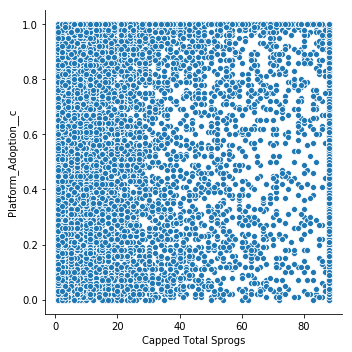

In [46]:
sns.relplot(x="Capped Total Sprogs", y="Platform_Adoption__c", data=AcctSuccessProgMergedSubset);

In [47]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
        return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]
    
def spearmanr_pval(x,y):
        return spearmanr(x,y)[1]

In [48]:
corr2 = AcctSuccessProgMergedSubset.corr(method=pearsonr_pval)
corr2

,Capped Total Sprogs,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c
Capped Total Sprogs,1.000000e+00,2.087598e-160,2.694890e-07,7.530475e-129,9.867451e-01,1.519575e-01
Capped Weighted_EWS_Score__c,2.087598e-160,1.000000e+00,4.674749e-236,0.000000e+00,1.638225e-153,3.076030e-133
TLP_30Days_SalesService__c,2.694890e-07,4.674749e-236,1.000000e+00,0.000000e+00,0.000000e+00,2.983281e-278
Platform_Adoption__c,7.530475e-129,0.000000e+00,0.000000e+00,1.000000e+00,3.353299e-216,4.699634e-152
Core_Service_EWS_360_Score__c,9.867451e-01,1.638225e-153,0.000000e+00,3.353299e-216,1.000000e+00,0.000000e+00
Core_SFA_EWS_360_Score__c,1.519575e-01,3.076030e-133,2.983281e-278,4.699634e-152,0.000000e+00,1.000000e+00


In [49]:
corr3 = AcctSuccessProgMergedSubset.corr(method=kendall_pval)
corr3

,Capped Total Sprogs,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c
Capped Total Sprogs,1.000000e+00,9.298863e-209,4.618427e-12,6.151637e-207,1.151487e-02,3.231280e-06
Capped Weighted_EWS_Score__c,9.298863e-209,1.000000e+00,3.819208e-169,0.000000e+00,2.656319e-128,4.850962e-140
TLP_30Days_SalesService__c,4.618427e-12,3.819208e-169,1.000000e+00,2.375278e-211,0.000000e+00,6.298464e-212
Platform_Adoption__c,6.151637e-207,0.000000e+00,2.375278e-211,1.000000e+00,1.987233e-207,1.964814e-135
Core_Service_EWS_360_Score__c,1.151487e-02,2.656319e-128,0.000000e+00,1.987233e-207,1.000000e+00,0.000000e+00
Core_SFA_EWS_360_Score__c,3.231280e-06,4.850962e-140,6.298464e-212,1.964814e-135,0.000000e+00,1.000000e+00


In [50]:
corr4 = AcctSuccessProgMergedSubset.corr(method=spearmanr_pval)
corr4

,Capped Total Sprogs,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c
Capped Total Sprogs,1.000000e+00,1.598019e-214,4.825290e-12,3.606263e-212,6.010551e-03,1.621870e-06
Capped Weighted_EWS_Score__c,1.598019e-214,1.000000e+00,2.025652e-156,0.000000e+00,6.692856e-120,6.951146e-134
TLP_30Days_SalesService__c,4.825290e-12,2.025652e-156,1.000000e+00,1.072375e-204,0.000000e+00,9.395269e-218
Platform_Adoption__c,3.606263e-212,0.000000e+00,1.072375e-204,1.000000e+00,3.454441e-217,5.135379e-145
Core_Service_EWS_360_Score__c,6.010551e-03,6.692856e-120,0.000000e+00,3.454441e-217,1.000000e+00,0.000000e+00
Core_SFA_EWS_360_Score__c,1.621870e-06,6.951146e-134,9.395269e-218,5.135379e-145,0.000000e+00,1.000000e+00


# Review impact of Has SM

In [51]:
#Add flag for Has SM
AcctSuccessProgMerged['hasSM'] = np.where(AcctSuccessProgMerged['Account__r.CSM_lookup__r']!= '[User]', 0, 1)
AcctSuccessProgMerged.head()

,Account__r.CSG_Coverage__c,Account__r.AOV_Band__c,Account__r.CSM_lookup__r,Core_SFA_EWS_360_Score__c,Lightning_Adoption_Stage__c,Core_Service_EWS_360_Score__c,Weighted_EWS_Score__c,Platform_Adoption__c,Lightning_Adoption__c,Current_Adoption_Growth__c,...,Visualforce Check,Web,Webinar,Total Sprogs,High Count,Low Count,Tech Count,Capped Weighted_EWS_Score__c,Capped Total Sprogs,hasSM
0,Focus,$0,NaN,14.0,0. None / Unknown,NaN,6120.0,0.00,No Lightning Usage,-36.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6120.0,NaN,0
1,Focus,$1M-5M,[User],91.0,4. Activation,81.0,8132.0,0.57,Lightning Enabled,-6.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8132.0,NaN,1
2,Focus,$0,NaN,56.0,4. Activation,NaN,864.0,0.79,Lightning Enabled,-5.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864.0,NaN,0
3,Top,$10k-50k,NaN,28.0,4. Activation,47.0,1406.0,0.09,Lightning Enabled,1.66,...,NaN,NaN,NaN,3.0,0.0,0.0,3.0,1406.0,3.0,0
4,Focus,$0,NaN,63.0,1. Awareness,NaN,576.0,0.79,No Lightning Usage,-4.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576.0,NaN,0


In [52]:
# total of Accts with SM
print(AcctSuccessProgMerged['hasSM'].sum())

13109


In [53]:
AcctSuccessProgMerged['hasSM'].describe()

count    18787.000000
mean         0.697770
std          0.459237
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: hasSM, dtype: float64

In [54]:
AcctSuccessProgMergedSubset2 = pd.DataFrame(AcctSuccessProgMerged,columns=['hasSM',
                                                 'Capped Weighted_EWS_Score__c',
                                                 'TLP_30Days_SalesService__c',
                                                 'Platform_Adoption__c',   
                                                 'Core_Service_EWS_360_Score__c', 
                                                 'Core_SFA_EWS_360_Score__c','Capped Total Sprogs'
                                                    ,'High Count', 
                                                    'Low Count', 'Tech Count'])


In [55]:
corr = AcctSuccessProgMergedSubset2.corr()
corr.style.background_gradient(cmap='Greens').set_precision(3)

,hasSM,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c,Capped Total Sprogs,High Count,Low Count,Tech Count
hasSM,1,0.17,0.0593,0.155,0.156,0.112,-0.0568,-0.000937,0.00827,0.000113
Capped Weighted_EWS_Score__c,0.17,1,0.237,0.611,0.259,0.24,0.234,0.0367,0.117,0.0108
TLP_30Days_SalesService__c,0.0593,0.237,1,0.287,0.499,0.342,0.0455,0.0126,0.0438,0.00356
Platform_Adoption__c,0.155,0.611,0.287,1,0.309,0.256,0.213,0.0283,0.0964,0.00488
Core_Service_EWS_360_Score__c,0.156,0.259,0.499,0.309,1,0.55,0.000181,0.0123,0.0597,-0.00795
Core_SFA_EWS_360_Score__c,0.112,0.24,0.342,0.256,0.55,1,0.0162,0.00603,0.0423,0.00927
Capped Total Sprogs,-0.0568,0.234,0.0455,0.213,0.000181,0.0162,1,0.0742,0.205,0.0659
High Count,-0.000937,0.0367,0.0126,0.0283,0.0123,0.00603,0.0742,1,0.824,0.014
Low Count,0.00827,0.117,0.0438,0.0964,0.0597,0.0423,0.205,0.824,1,0.0405
Tech Count,0.000113,0.0108,0.00356,0.00488,-0.00795,0.00927,0.0659,0.014,0.0405,1


In [56]:
SMRelevant_cols = ['Core_SFA_EWS_360_Score__c',
       'Core_Service_EWS_360_Score__c',
       'Capped Weighted_EWS_Score__c', 
    'Platform_Adoption__c',
       'Current_Adoption_Growth__c',
        'Capped Total Sprogs''High Count', 'Low Count', 'Tech Count']
       

In [57]:
# Grouped by hasSM 
SMTable = AcctSuccessProgMergedSubset2.groupby(['hasSM']).mean().transpose()
SMTable

hasSM,0,1
Capped Weighted_EWS_Score__c,6890.729949,12520.474132
TLP_30Days_SalesService__c,63.455387,67.478403
Platform_Adoption__c,0.392360,0.503482
Core_Service_EWS_360_Score__c,54.735025,61.580164
Core_SFA_EWS_360_Score__c,47.239110,52.866922
Capped Total Sprogs,28.164218,24.333900
High Count,1.170268,1.120365
Low Count,5.652550,6.258897
Tech Count,103.461827,104.237438


In [58]:
AcctSuccessProgMergedSubset2[AcctSuccessProgMergedSubset2['hasSM']==1].describe()

,hasSM,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c,Capped Total Sprogs,High Count,Low Count,Tech Count
count,13109.0,13109.000000,13019.000000,12825.000000,7179.000000,7056.000000,9413.000000,9413.000000,9413.000000,9413.000000
mean,1.0,12520.474132,67.478403,0.503482,61.580164,52.866922,24.333900,1.120365,6.258897,104.237438
std,0.0,15884.092265,30.341920,0.331077,18.997311,23.264620,29.266826,27.143569,36.818991,3523.599821
min,1.0,0.000000,0.000000,0.000000,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,1.0,252.000000,50.000000,0.210000,52.000000,34.000000,3.000000,0.000000,1.000000,1.000000
50%,1.0,3456.000000,76.470000,0.490000,63.000000,55.000000,10.000000,0.000000,2.000000,6.000000
75%,1.0,23298.000000,91.230000,0.820000,78.000000,72.000000,34.000000,0.000000,5.000000,26.000000
max,1.0,40870.000000,100.000000,1.000000,97.000000,97.000000,88.000000,2595.000000,2949.000000,335184.000000


In [59]:
AcctSuccessProgMergedSubset2[AcctSuccessProgMergedSubset2['hasSM']==0].describe()

,hasSM,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c,Capped Total Sprogs,High Count,Low Count,Tech Count
count,5678.0,5678.000000,5601.000000,5589.000000,2838.000000,3145.000000,3471.000000,3471.000000,3471.000000,3471.000000
mean,0.0,6890.729949,63.455387,0.392360,54.735025,47.239110,28.164218,1.170268,5.652550,103.461827
std,0.0,12505.748336,32.631022,0.309307,20.828036,22.291444,31.511694,8.504353,15.819397,963.469659
min,0.0,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,41.670000,0.110000,39.000000,28.000000,3.000000,0.000000,0.000000,1.000000
50%,0.0,832.000000,71.950000,0.300000,56.000000,51.000000,13.000000,0.000000,2.000000,10.000000
75%,0.0,5831.000000,90.960000,0.680000,68.000000,62.000000,47.000000,0.000000,5.000000,40.000000
max,0.0,40870.000000,100.000000,1.000000,96.000000,94.000000,88.000000,292.000000,321.000000,42127.000000


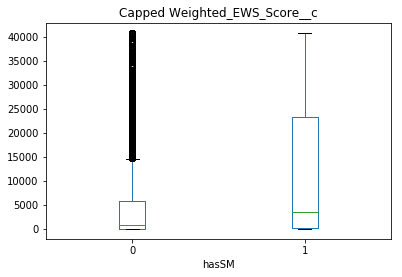

In [60]:
# Boxplot for Weighted EWS with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Capped Weighted_EWS_Score__c'], grid = False)
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.show()

In [61]:
SMTable = AcctSuccessProgMergedSubset2.groupby(['hasSM']).mean()
SMTable

,Capped Weighted_EWS_Score__c,TLP_30Days_SalesService__c,Platform_Adoption__c,Core_Service_EWS_360_Score__c,Core_SFA_EWS_360_Score__c,Capped Total Sprogs,High Count,Low Count,Tech Count
hasSM,,,,,,,,,
0,6890.729949,63.455387,0.392360,54.735025,47.239110,28.164218,1.170268,5.652550,103.461827
1,12520.474132,67.478403,0.503482,61.580164,52.866922,24.333900,1.120365,6.258897,104.237438


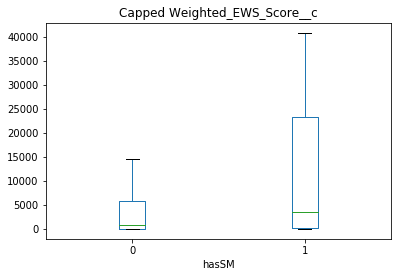

In [62]:
# Boxplot for Weighted EWS with outliers removed
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Capped Weighted_EWS_Score__c'], grid = False, showfliers=False)
plt.suptitle("")
plt.show()

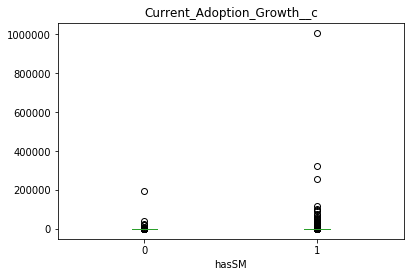

In [63]:
# Boxplot for Current_Adoption_Growth__c  with outliers 
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Current_Adoption_Growth__c'], grid = False)
plt.suptitle("")
plt.show()

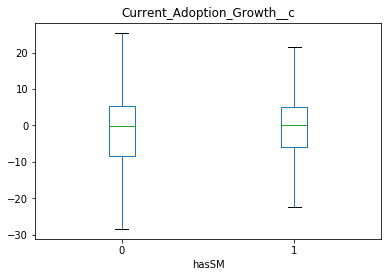

In [64]:
# Boxplot for Current_Adoption_Growth__c  with outliers removed
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Current_Adoption_Growth__c'], grid = False, showfliers=False)
plt.suptitle("")
plt.show()

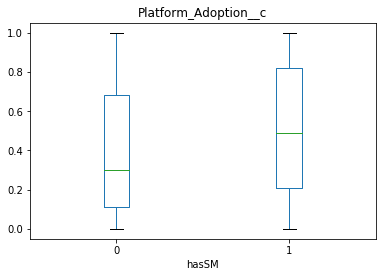

In [65]:
# Boxplot for Platform Adoption with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Platform_Adoption__c'], grid = False)
plt.suptitle("")
plt.show()

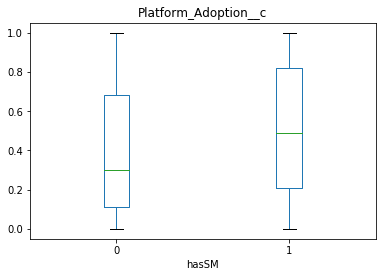

In [66]:
# Boxplot for Platform Adoption with outliers removed
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Platform_Adoption__c'], grid = False, showfliers=False)
plt.suptitle("")
plt.show()

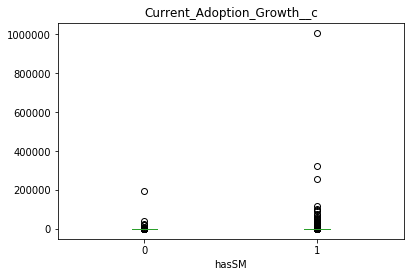

In [67]:
# Boxplot for Current_Adoption_Growth__c  with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Current_Adoption_Growth__c'], grid = False)
plt.suptitle("")
plt.show()

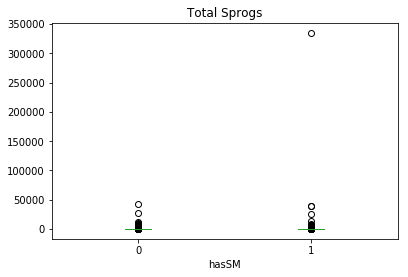

In [69]:
# Boxplot for Current_Adoption_Growth__c  with outliers 
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Total Sprogs'], grid = False)
plt.suptitle("")
plt.show()

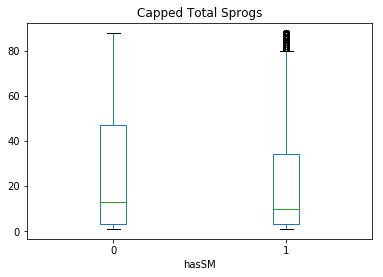

In [68]:
# Boxplot for Current_Adoption_Growth__c  with outliers removed
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Capped Total Sprogs'], grid = False)
plt.suptitle("")
plt.show()

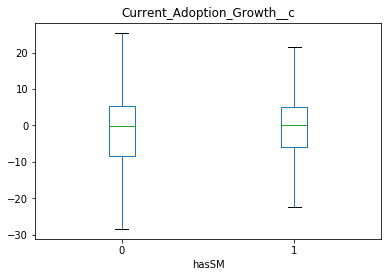

In [70]:
# Boxplot for Current_Adoption_Growth__c  with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Current_Adoption_Growth__c'], grid = False, showfliers=False)
plt.suptitle("")
plt.show()

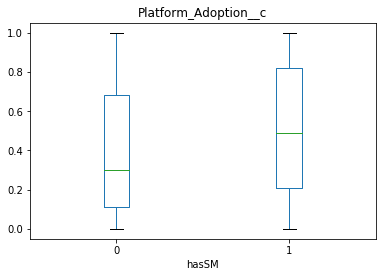

In [71]:
# Boxplot for Platform Adoption with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Platform_Adoption__c'], grid = False)
plt.suptitle("")
plt.show()

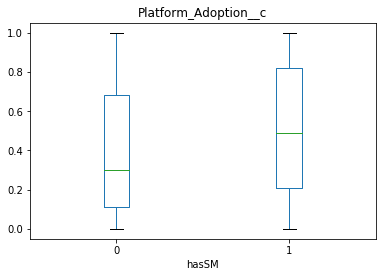

In [72]:
# Boxplot for Platform Adoption with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Platform_Adoption__c'], grid = False)
plt.suptitle("")
plt.show()

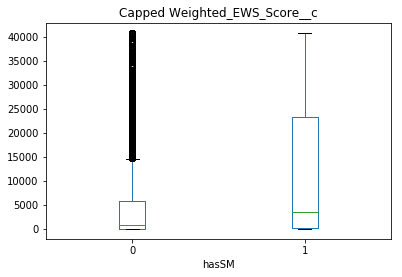

In [73]:
# Boxplot for 'Capped Weighted_EWS_Score__c' with outliers
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Capped Weighted_EWS_Score__c'], grid = False)
plt.suptitle("")
plt.show()

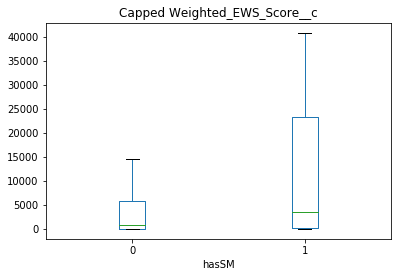

In [74]:
# Boxplot for 'Capped Weighted_EWS_Score__c' with outliers removed
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Capped Weighted_EWS_Score__c'], grid = False, showfliers=False)
plt.suptitle("")
plt.show()

In [75]:
AcctSuccessProgMerged.columns

Index(['Account__r.CSG_Coverage__c', 'Account__r.AOV_Band__c',
       'Account__r.CSM_lookup__r', 'Core_SFA_EWS_360_Score__c',
       'Lightning_Adoption_Stage__c', 'Core_Service_EWS_360_Score__c',
       'Weighted_EWS_Score__c', 'Platform_Adoption__c',
       'Lightning_Adoption__c', 'Current_Adoption_Growth__c',
       'TLP_TTM30Days_SalesService__c', 'FY_TLP_Baseline_SalesService__c',
       'TLP_30Days_SalesService__c', 'EWS_360_Scores_Snap_Date__c', 'uuid',
       'ADR', 'Accelerator', 'Admin Assist', 'Community',
       'Customer Success Request', 'Digital Campaigns', 'Einstein Assessor',
       'Email', 'Executive/Critical Incidents', 'High Touch',
       'In Person Training', 'In-App', 'JavaScript Buttons Check',
       'Live and Virtual Events', 'MANUAL_PROD', 'Optimizer',
       'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD', 'Success Apps',
       'Success Assessment', 'Success Play', 'Support Case', 'Trail',
       'User Group', 'Video', 'Visualforce Check', 'Web', 'W

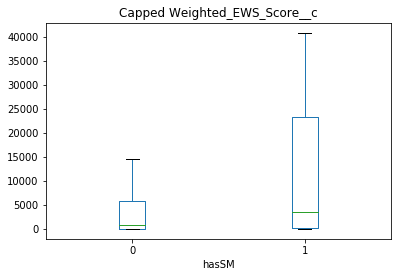

In [76]:
# Boxplot for 'Total Succes Prog' with outliers removed
AcctSuccessProgMerged.boxplot(by ='hasSM', column =['Capped Weighted_EWS_Score__c'], grid = False, showfliers=False)
plt.suptitle("")
plt.show()

# Investigate diferent delivery methods

In [77]:
AcctSuccessProgMerged.columns

Index(['Account__r.CSG_Coverage__c', 'Account__r.AOV_Band__c',
       'Account__r.CSM_lookup__r', 'Core_SFA_EWS_360_Score__c',
       'Lightning_Adoption_Stage__c', 'Core_Service_EWS_360_Score__c',
       'Weighted_EWS_Score__c', 'Platform_Adoption__c',
       'Lightning_Adoption__c', 'Current_Adoption_Growth__c',
       'TLP_TTM30Days_SalesService__c', 'FY_TLP_Baseline_SalesService__c',
       'TLP_30Days_SalesService__c', 'EWS_360_Scores_Snap_Date__c', 'uuid',
       'ADR', 'Accelerator', 'Admin Assist', 'Community',
       'Customer Success Request', 'Digital Campaigns', 'Einstein Assessor',
       'Email', 'Executive/Critical Incidents', 'High Touch',
       'In Person Training', 'In-App', 'JavaScript Buttons Check',
       'Live and Virtual Events', 'MANUAL_PROD', 'Optimizer',
       'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD', 'Success Apps',
       'Success Assessment', 'Success Play', 'Support Case', 'Trail',
       'User Group', 'Video', 'Visualforce Check', 'Web', 'W

In [111]:
# Define Success Prog Category columns
SuccOutcomeCat_cols =['High Count',
                      'Low Count', 'Tech Count']

In [108]:
# Define Success Prog Delivery Method columns
SuccProgDelM_cols = ['ADR', 'Accelerator', 'Admin Assist', 'Community',
       'Customer Success Request', 'Digital Campaigns', 'Einstein Assessor',
       'Email', 'Executive/Critical Incidents', 'High Touch',
       'In Person Training', 'In-App', 'JavaScript Buttons Check',
       'Live and Virtual Events', 'MANUAL_PROD', 'Optimizer',
       'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD', 'Success Apps',
       'Success Assessment', 'Success Play', 'Support Case', 'Trail',
       'User Group', 'Video', 'Visualforce Check', 'Web', 'Webinar',
        'High Count', 'Low Count', 'Tech Count', 'Capped Total Sprogs']

In [118]:
# Define Success Prog Delivery Method columns - all 
Full-SuccProgDelM_cols = ['Capped Weighted_EWS_Score__c', 'TLP_30Days_SalesService__c', 'Platform_Adoption__c','Core_Service_EWS_360_Score__c', 'Core_SFA_EWS_360_Score__c','ADR', 'Accelerator', 'Admin Assist', 'Community',  'Customer Success Request', 'Digital Campaigns', 'Einstein Assessor', 'Email', 'Executive/Critical Incidents', 'High Touch','In Person Training', 'In-App', 'JavaScript Buttons Check', 'Live and Virtual Events', 'MANUAL_PROD', 'Optimizer', 'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD', 'Success Apps', 'Success Assessment', 'Success Play', 'Support Case', 'Trail', 'User Group', 'Video', 'Visualforce Check', 'Web', 'Webinar','High Count', 'Low Count', 'Tech Count', 'Capped Total Sprogs']


SyntaxError: can't assign to operator (<ipython-input-118-48e76a70a410>, line 2)

In [100]:
# Define Success Prog Delivery Method columns - Categories 
Cat-SuccProgDelM_cols =['Capped Weighted_EWS_Score__c', 'TLP_30Days_SalesService__c','Platform_Adoption__c', 'Core_Service_EWS_360_Score__c', 'Core_SFA_EWS_360_Score__c', 'High Count', 'Low Count', 'Tech Count', 'Capped Total Sprogs']


SyntaxError: can't assign to operator (<ipython-input-100-9bbacb524784>, line 2)

In [ ]:
AcctSuccessProgMergedDelM1 = pd.DataFrame(AcctSuccessProgMerged,columns= ['Capped Weighted_EWS_Score__c',
                                                 'TLP_30Days_SalesService__c',
                                                 'Platform_Adoption__c',   
                                                 'Core_Service_EWS_360_Score__c', 
                                                 'Core_SFA_EWS_360_Score__c',
    'ADR', 'Accelerator', 'Admin Assist', 'Community',
       'Customer Success Request', 'Digital Campaigns', 'Einstein Assessor',
       'Email', 'Executive/Critical Incidents', 'High Touch',
       'In Person Training', 'In-App', 'JavaScript Buttons Check',
       'Live and Virtual Events', 'MANUAL_PROD', 'Optimizer',
       'Readiness Check', 'Renewal Touch', 'SCHEDULED_PROD', 'Success Apps',
       'Success Assessment', 'Success Play', 'Support Case', 'Trail',
       'User Group', 'Video', 'Visualforce Check', 'Web', 'Webinar',
        'High Count', 'Low Count', 'Tech Count', 'Capped Total Sprogs'])

In [ ]:
AcctSuccessProgMergedDelMCat = pd.DataFrame(AcctSuccessProgMerged,columns= ['Capped Weighted_EWS_Score__c',
                                                 'TLP_30Days_SalesService__c',
                                                 'Platform_Adoption__c',   
                                                 'Core_Service_EWS_360_Score__c', 
                                                 'Core_SFA_EWS_360_Score__c',
        'High Count', 'Low Count', 'Tech Count', 'Capped Total Sprogs'])

In [101]:
corr = AcctSuccessProgMergedDelM1.corr()
corr.style.background_gradient(cmap='Greens').set_precision(3)

NameError: name 'AcctSuccessProgMergedDelM1' is not defined

In [102]:
corr = AcctSuccessProgMergedDelMCat.corr()
corr.style.background_gradient(cmap='Greens').set_precision(3)

NameError: name 'AcctSuccessProgMergedDelMCat' is not defined

In [103]:
corr2 = AcctSuccessProgMergedDelM1.corr(method=pearsonr_pval)
corr2

NameError: name 'AcctSuccessProgMergedDelM1' is not defined

# Investigate clustering of accounts

In [ ]:
# Cluster by SM activities
ClusterModel = AcctSuccessProgMerged.filter(SMActivities_cols,axis=1)

In [ ]:
ClusterModel.head(5)

In [ ]:
# Cluster by SM activities - Categories
ClusterModelCat = AcctSuccessProgMerged.filter(SuccOutcomeCat_cols,axis=1)

In [ ]:
ClusterModelCat.head(5)

In [ ]:
n_clusters = 4

scaler = StandardScaler()
X_scale = scaler.fit_transform(ClusterModel.fillna(0))

model = KMeans(n_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=0)

model.fit(X_scale)

#add cluster column to df
AcctSuccessProgMerged['Cluster'] = model.labels_

In [ ]:
AcctSuccessProgMerged.head(5)

In [ ]:
clustertable = AcctSuccessProgMerged.groupby(['Cluster'])
clustertable

In [ ]:
AcctSuccessProgMerged['Cluster'].value_counts().sort_index()

In [ ]:
table = AcctSuccessProgMerged.groupby(['Cluster']).mean().transpose()
table

In [ ]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(ClusterModel.fillna(0))

In [ ]:
# Calc K means 1-K groups 
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scale)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# Plot K means sum of squares
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
print(km)

In [ ]:
# Scale for Categories
scaler = StandardScaler()
X_scale2 = scaler.fit_transform(ClusterModelCat.fillna(0))

In [ ]:
# Calc K means for Categories
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scale2)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# Plot K means sum of squares for Cats
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Cat Cluster 

n_clusters = 4

scaler = StandardScaler()
X_scale2 = scaler.fit_transform(ClusterModelCat.fillna(0))

model = KMeans(n_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=0)

model.fit(X_scale2)

#add cluster column to df
AcctSuccessProgMerged['ClusterCat'] = model.labels_

In [ ]:
Catclustertable = AcctSuccessProgMerged.groupby(['ClusterCat'])
Catclustertable

In [ ]:
AcctSuccessProgMerged['ClusterCat'].value_counts().sort_index()

In [ ]:
Cattable = AcctSuccessProgMerged.groupby(['ClusterCat']).mean().transpose()
Cattable